<a href="https://colab.research.google.com/github/catastropiyush/spectroscopy/blob/main/spectrometer_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
!pip install smplotlib
import smplotlib as smp

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 424.1/424.1 kB 4.7 MB/s eta 0:00:00


Upload your spectrum image:


Saving bluesign_spectrum.jpg to bluesign_spectrum (2).jpg


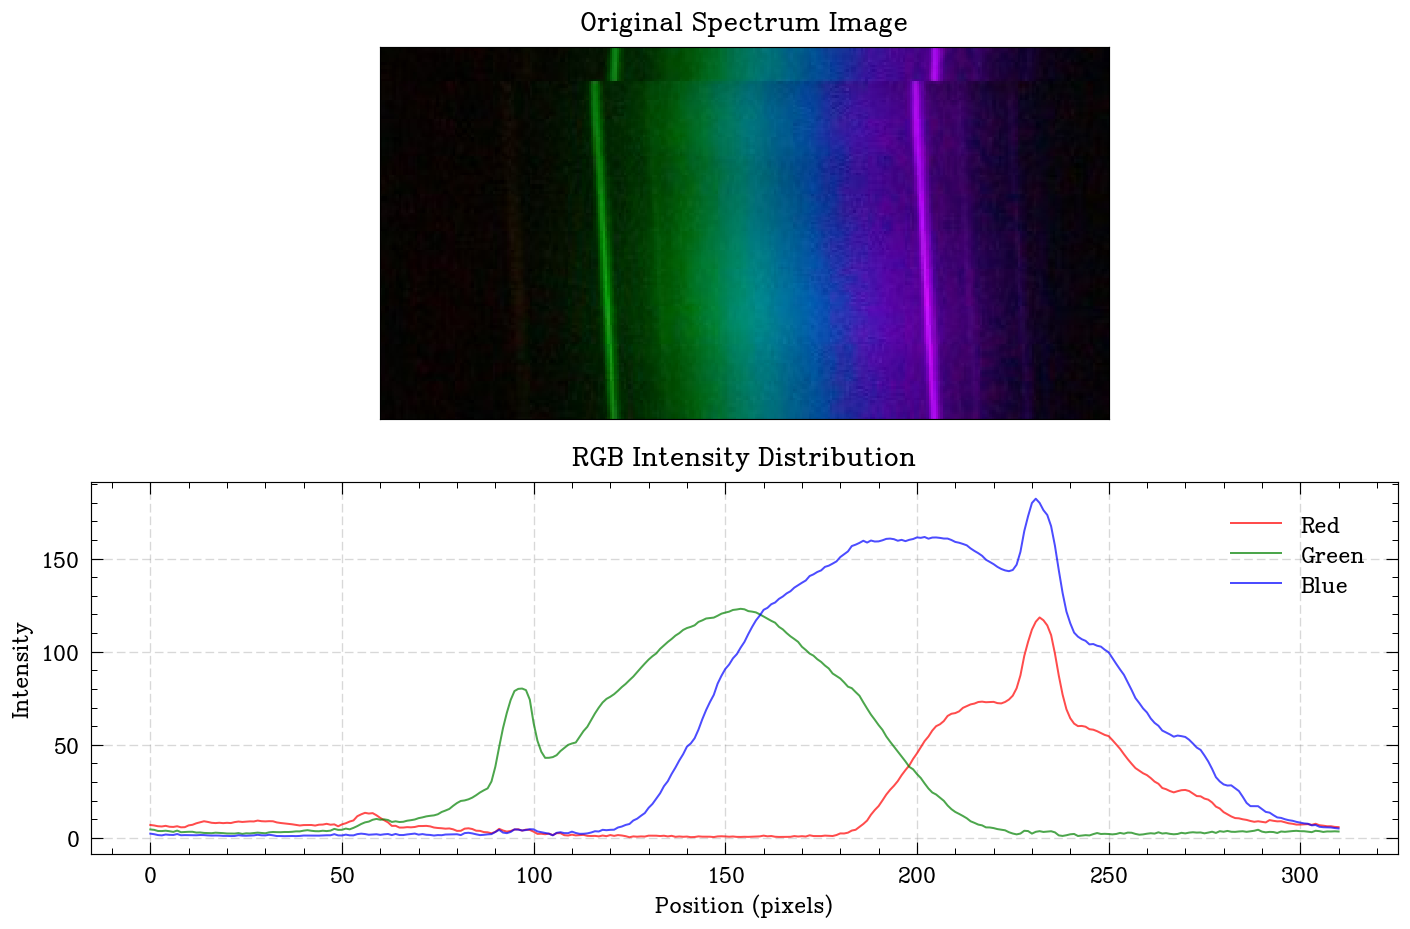

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from google.colab import files

def analyze_spectrum(image_path):
    # Load and convert image to numpy array
    img = Image.open(image_path)
    img_array = np.array(img)

    # Get image dimensions
    height, width = img_array.shape[:2]

    # Extract RGB channels
    r_channel = img_array[:, :, 0]
    g_channel = img_array[:, :, 1]
    b_channel = img_array[:, :, 2]

    # Calculate average intensity across each vertical column
    r_intensity = np.mean(r_channel, axis=0)
    g_intensity = np.mean(g_channel, axis=0)
    b_intensity = np.mean(b_channel, axis=0)

    # Create x-axis values
    x_values = np.arange(width)

    # Create subplot figure
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8))

    # Display original image in first subplot
    ax1.imshow(img_array)
    ax1.set_title('Original Spectrum Image')
    ax1.set_xticks([])
    ax1.set_yticks([])

    # Plot intensity curves in second subplot
    ax2.plot(x_values, r_intensity, 'r-', label='Red', alpha=0.7)
    ax2.plot(x_values, g_intensity, 'g-', label='Green', alpha=0.7)
    ax2.plot(x_values, b_intensity, 'b-', label='Blue', alpha=0.7)

    ax2.set_title('RGB Intensity Distribution')
    ax2.set_xlabel('Position (pixels)')
    ax2.set_ylabel('Intensity')
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    return r_intensity, g_intensity, b_intensity

# Code to run in Colab
print("Upload your spectrum image:")
uploaded = files.upload()

# Get the filename of the uploaded file
filename = list(uploaded.keys())[0]

# Analyze the spectrum
r_intensity, g_intensity, b_intensity = analyze_spectrum(filename)